Import packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [6]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [7]:
df_com['market_value']=df_com.spx

In [8]:
del df_com['dax']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

LLR Test

In [9]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

Returns

In [10]:
df['returns'] = df.market_value.pct_change(1)*100

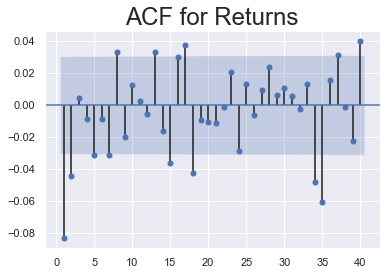

In [11]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

MA Model

In [21]:
model_ret_ma = ARMA(df.returns[1:], order=(0,1))
results_ret_ma = model_ret_ma.fit()
results_ret_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 1)   Log Likelihood               -6847.735
Method:                       css-mle   S.D. of innovations              1.240
Date:                Mon, 02 Mar 2020   AIC                          13701.470
Time:                        17:56:09   BIC                          13720.492
Sample:                    01-04-2000   HQIC                         13708.197
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.818      0.413      -0.020       0.048
ma.L1.returns    -0.0924      0.016     -5.731      0.000      -0.124      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           10.8179           +0.0000j           10.8179            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_1, results_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 2)   Log Likelihood               -6843.440
Method:                       css-mle   S.D. of innovations              1.239
Date:                Mon, 02 Mar 2020   AIC                          13694.880
Time:                        17:52:06   BIC                          13720.242
Sample:                    01-04-2000   HQIC                         13703.849
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.861      0.389      -0.018       0.047
ma.L1.returns    -0.0884      0.015     -5.716      0.000      -0.119      -0.058
ma.L2.returns    -0.0462      0.016     

In [14]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_2, results_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 3)   Log Likelihood               -6843.436
Method:                       css-mle   S.D. of innovations              1.239
Date:                Mon, 02 Mar 2020   AIC                          13696.872
Time:                        17:52:11   BIC                          13728.576
Sample:                    01-04-2000   HQIC                         13708.084
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.862      0.389      -0.018       0.047
ma.L1.returns    -0.0883      0.015     -5.713      0.000      -0.119      -0.058
ma.L2.returns    -0.0462      0.016     

In [15]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_3, results_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 4)   Log Likelihood               -6842.949
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13697.898
Time:                        17:52:20   BIC                          13735.942
Sample:                    01-04-2000   HQIC                         13711.352
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.877      0.381      -0.018       0.046
ma.L1.returns    -0.0894      0.016     -5.765      0.000      -0.120      -0.059
ma.L2.returns    -0.0458      0.016     

In [16]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_4, results_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 5)   Log Likelihood               -6840.241
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13694.481
Time:                        17:52:21   BIC                          13738.866
Sample:                    01-04-2000   HQIC                         13710.177
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.910      0.363      -0.016       0.045
ma.L1.returns    -0.0896      0.015     -5.789      0.000      -0.120      -0.059
ma.L2.returns    -0.0476      0.016     

In [17]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_5, results_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 6)   Log Likelihood               -6840.020
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13696.039
Time:                        17:52:22   BIC                          13746.765
Sample:                    01-04-2000   HQIC                         13713.978
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.015      0.920      0.358      -0.016       0.045
ma.L1.returns    -0.0898      0.015     -5.804      0.000      -0.120      -0.059
ma.L2.returns    -0.0467      0.016     

In [18]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_6, results_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 7)   Log Likelihood               -6838.374
Method:                       css-mle   S.D. of innovations              1.237
Date:                Mon, 02 Mar 2020   AIC                          13694.747
Time:                        17:52:24   BIC                          13751.814
Sample:                    01-04-2000   HQIC                         13714.928
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.015      0.945      0.345      -0.015       0.044
ma.L1.returns    -0.0876      0.016     -5.655      0.000      -0.118      -0.057
ma.L2.returns    -0.0470      0.016     

In [19]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ret_ma_7, results_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(0, 8)   Log Likelihood               -6836.436
Method:                       css-mle   S.D. of innovations              1.236
Date:                Mon, 02 Mar 2020   AIC                          13692.872
Time:                        17:52:34   BIC                          13756.279
Sample:                    01-04-2000   HQIC                         13715.295
                         - 01-26-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.916      0.360      -0.016       0.045
ma.L1.returns    -0.0876      0.015     -5.661      0.000      -0.118      -0.057
ma.L2.returns    -0.0482      0.016     

In [20]:
LLR_test(results_ret_ma_6, results_ret_ma_8, DF=2)

0.028

In [22]:
LLR_test(results_ret_ma, results_ret_ma_8, DF=2)

0.0

Residuals for Returns

In [23]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [24]:
df.res_ret_ma_8.mean()

0.0007823977776798401

In [25]:
df.res_ret_ma_8.var()

1.5261521650069447

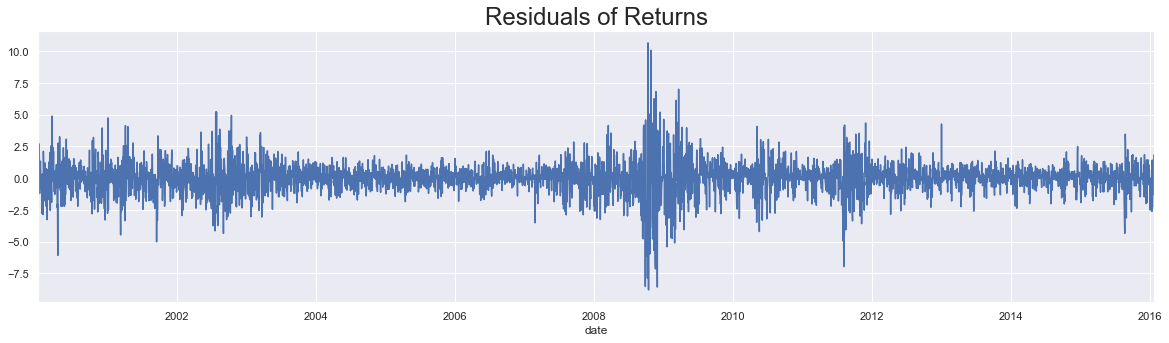

In [27]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [28]:
sts.adfuller(df.res_ret_ma_8[2:])

(-64.7287459659379,
 0.0,
 0,
 4189,
 {'1%': -3.4319120223653132,
  '5%': -2.8622302155703507,
  '10%': -2.5671374076308826},
 13560.159999030115)

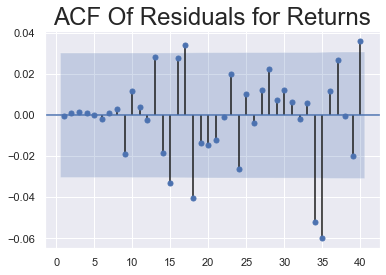

In [29]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()